In [3]:
!pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.0/38.8 MB 487.6 kB/s eta 0:01:20
   ---------------------------------------- 0.0/38.8 MB 487.6 kB/s eta 0:01:20
   ---------------------------------------- 0.1/38.8 MB 328.2 kB/s eta 0:01:59
   ---------------------------------------- 0.1/38.8 MB 328.2 kB/s eta 0:01:59
   ---------------------------------------- 0.1/38.8 MB 346.5 kB/s eta 0:01:52
   ---------------------------------------- 0.1/38.8 MB 425.3 kB/s eta 0:01:31
   ---------------------------------------- 0.1/38.8 MB 425.3 kB/s eta 0:01:31
   ---

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Data successfully loaded.")

Data successfully loaded.


In [5]:
# Loading the MNIST dataset into training and testing sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
print(type(X_train))

<class 'numpy.ndarray'>


In [7]:
print(f"X_train shape: {X_train.shape}")  # shape of the training and testing data
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


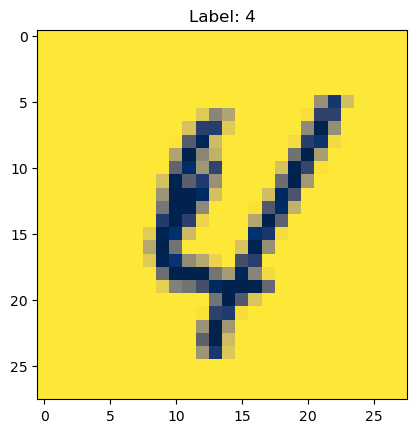

In [30]:
# Visualizing a single sample image from the training dataset
plt.imshow(X_train[700], cmap='cividis_r')  # Displaying the image at index 700 in YIGnBU
plt.title(f"Label: {Y_train[700]}")   # Setting the title of the plot to show the label of the image
plt.show()                             # Displaying the image


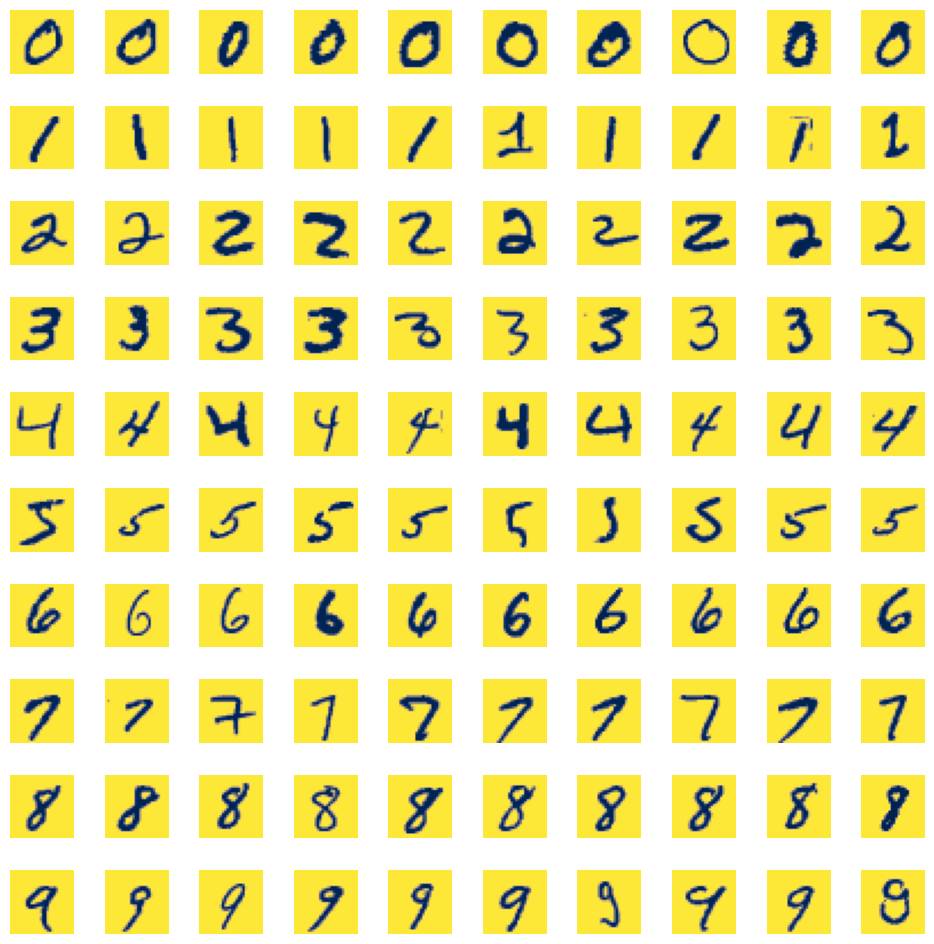

In [17]:
# Initialize a dictionary to hold the first 10 images of each class (0-9)
class_images = {i: [] for i in range(10)}

# Iterate through the training dataset
for i, (image, label) in enumerate(zip(X_train, Y_train)):
    if len(class_images[label]) < 10:
        class_images[label].append(image)
    # Stop once we have 10 images for each class
    if all(len(images) == 10 for images in class_images.values()):
        break

# Plot the images
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

# Display the first 10 images of each class
for i in range(10):  # For each digit (0-9)
    for j in range(10):  # For each of the first 10 images of that digit
        axes[i, j].imshow(class_images[i][j], cmap='cividis_r')
        axes[i, j].axis('off')  # Hide the axes
        if j == 0:  # Label the first image in each row
            axes[i, j].set_ylabel(f'Digit {i}', rotation=0, labelpad=30, fontsize=10)

# Display the plot
plt.show()

In [18]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [19]:
print(X_train[1].shape)

(28, 28)


In [20]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [21]:
#Unique values in Y_train
print(np.unique(Y_train))
#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [22]:
#scale the values
X_train=X_train/255
X_test=X_test/255

In [23]:
print(X_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Building Neural Network

In [24]:
#setting the layers of neural network
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),        
    keras.layers.Flatten(),                     
    keras.layers.Dense(50, activation='relu'),  
    keras.layers.Dense(50, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8443 - loss: 0.5294
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9554 - loss: 0.1494
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9681 - loss: 0.1055
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9750 - loss: 0.0839
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9792 - loss: 0.0690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9830 - loss: 0.0569
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9857 - loss: 0.0483
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9879 - loss: 0.0419
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9896 - loss: 0.0367
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9899 - loss: 0.0327


In [26]:
from sklearn.metrics import confusion_matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


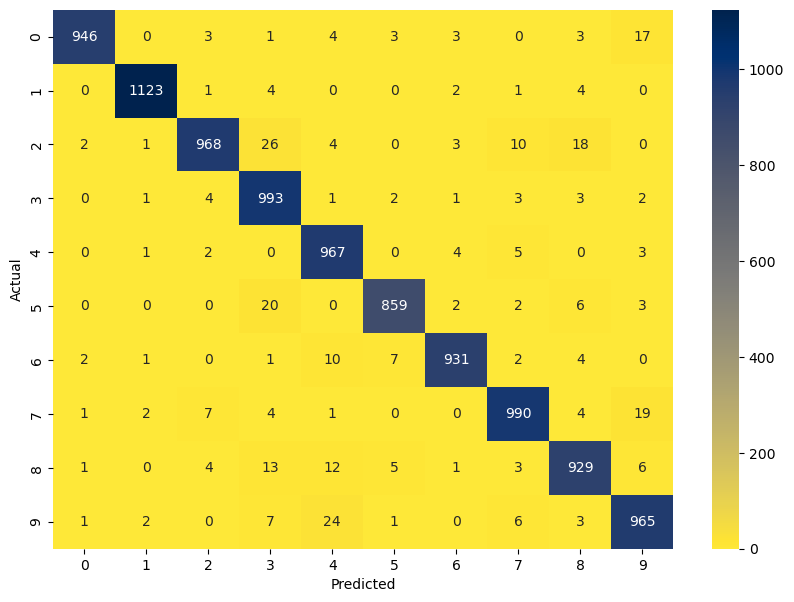

In [29]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Y_test, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),  
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')  
])


In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9150 - loss: 0.2926
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9833 - loss: 0.0535
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9906 - loss: 0.0303
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9949 - loss: 0.0176
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9963 - loss: 0.0111
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9970 - loss: 0.0097
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9976 - loss: 0.0071
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9983 - loss: 0.0053
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9984 - loss: 0.0049
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9984 - loss: 0.0046


In [36]:
loss, accuracy = model.evaluate(X_test, Y_test)

# Creating a DataFrame to display the results
results = pd.DataFrame({
    'Metric': ['Loss', 'Accuracy'],
    'Value': [loss, accuracy]
})

# Printing the results in table form
print(results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9828 - loss: 0.0766
     Metric     Value
0      Loss  0.057234
1  Accuracy  0.986600


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


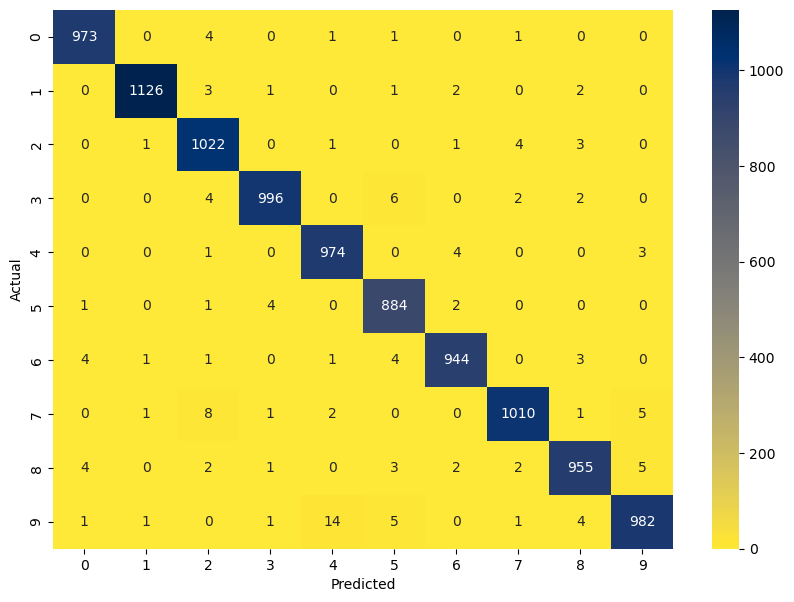

In [38]:
# Get predictions
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [39]:
# Save the model
model.save('mnist_model.keras')
